In [28]:
import matplotlib.pyplot as plt
import matplotlib_inline
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os

In [30]:
df = pd.concat([pd.read_parquet(f"data/chunks/chunk_{j}.parquet") for j in (range(1, 21))])

### Article type stats

In [31]:
for type in df['type'].unique():
    name = f'{type}_df'
    globals()[name] = df[df['type'] == type]

    print(f'Articles of type {type}: {len(globals()[name])}')

    print(f'{type} mean length: {globals()[name]["length"].mean()}')
    print(f'{type} median length: {globals()[name]["length"].median()}')

    print(f'{type} mean distinct words: {globals()[name]["length_distinct_words"].mean()}')
    print(f'{type} median distinct words: {globals()[name]["length_distinct_words"].median()}')

    print('\n')

Articles of type political: 194517
political mean length: 319.33829433931226
political median length: 215.0
political mean distinct words: 202.53099729072522
political median distinct words: 175.0


Articles of type fake: 104883
fake mean length: 253.16100798032093
fake median length: 148.0
fake mean distinct words: 150.33183642725703
fake median distinct words: 106.0


Articles of type satire: 13160
satire mean length: 150.6191489361702
satire median length: 128.0
satire mean distinct words: 104.49673252279635
satire median distinct words: 103.0


Articles of type reliable: 218563
reliable mean length: 292.0183471127318
reliable median length: 202.0
reliable mean distinct words: 186.70019628207885
reliable median distinct words: 146.0


Articles of type conspiracy: 97314
conspiracy mean length: 223.29544567071542
conspiracy median length: 81.0
conspiracy mean distinct words: 134.8452535092587
conspiracy median distinct words: 64.0


Articles of type unreliable: 35332
unreliable mean l

### Most common words

#### Including numtoken:

In [32]:
word_counts = {}
for content in df['content']:
    for word in content:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1


C:\Users\Rasmus\AppData\Local\Temp\ipykernel_2308\3966387697.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


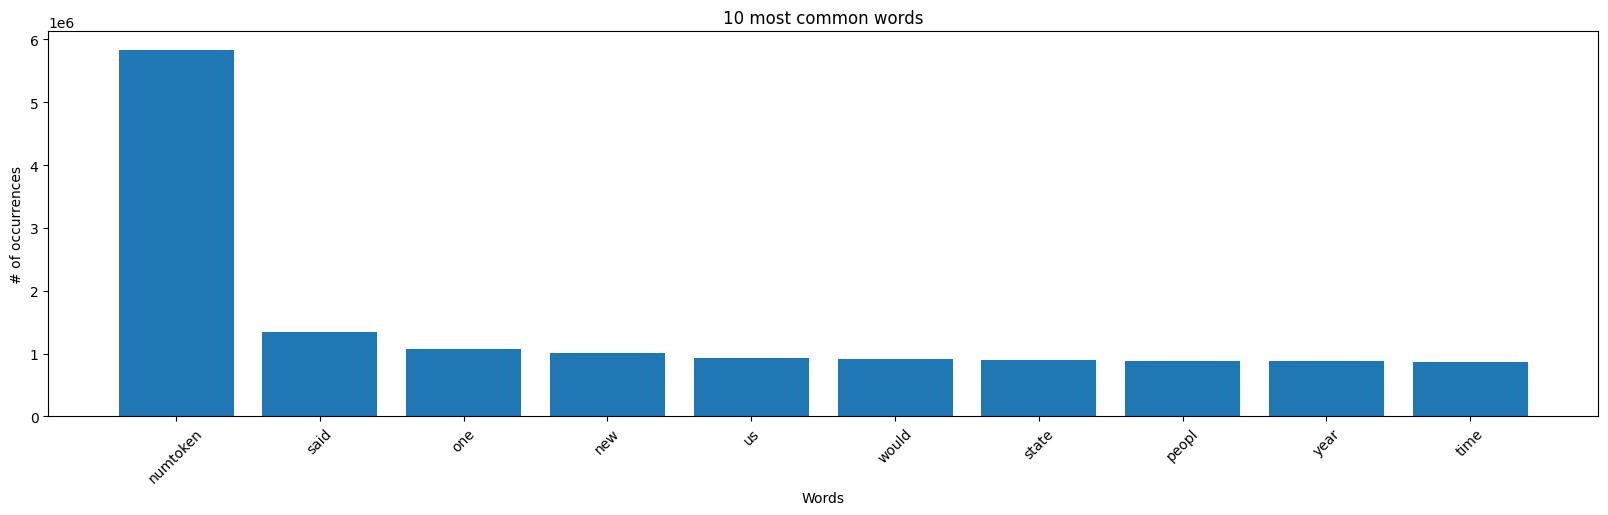

In [33]:
top_10_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
ws = []
cs = []
for word in top_10_words:
    (w, c) = word
    ws.append(w)
    cs.append(c)

fig1 = plt.figure(figsize=(20, 5))
ax1 = fig1.add_subplot(111)
ax1.bar(ws, cs)
ax1.set_title('10 most common words')
ax1.set_xlabel('Words')
plt.xticks(rotation=45)
ax1.set_ylabel('# of occurrences')
fig1.savefig('data/10_most_common_words.png')
fig1.show()

#### Without numtoken:

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_2308\2229835503.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


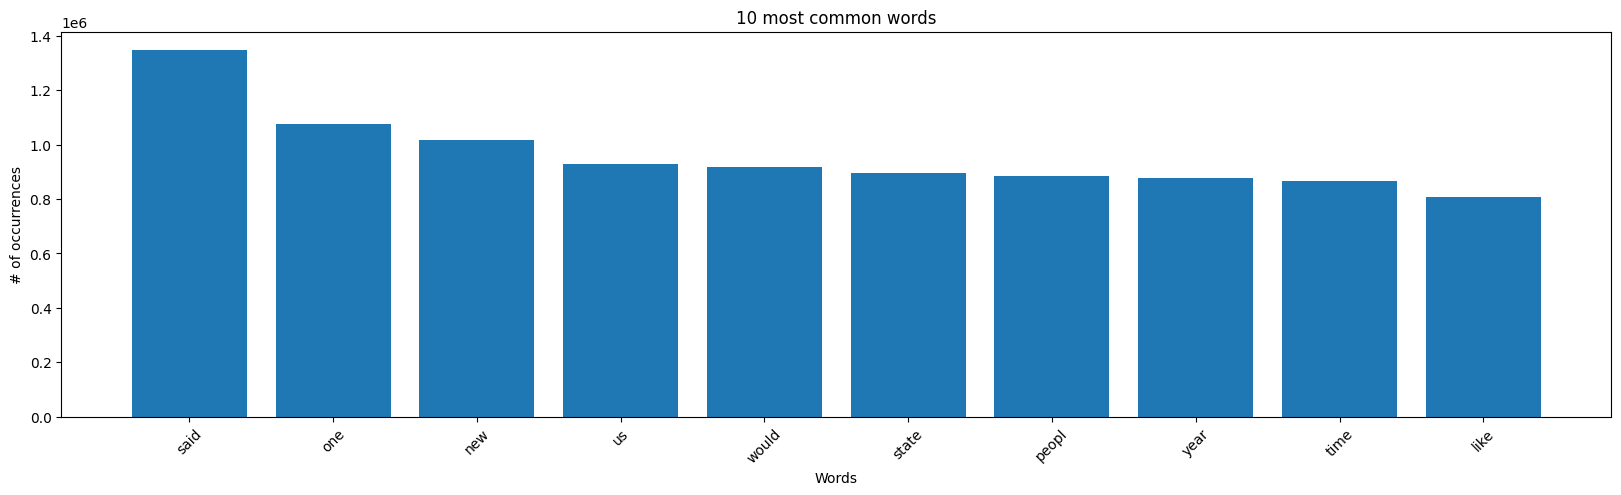

In [34]:
top_10_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[1:11]
ws = []
cs = []
for word in top_10_words:
    (w, c) = word
    ws.append(w)
    cs.append(c)

fig1 = plt.figure(figsize=(20, 5))
ax1 = fig1.add_subplot(111)
ax1.bar(ws, cs)
ax1.set_title('10 most common words')
ax1.set_xlabel('Words')
plt.xticks(rotation=45)
ax1.set_ylabel('# of occurrences')
fig1.savefig('data/10_most_common_words(-numtoken).png')
fig1.show()

#### Most common words by type

#### With numtoken:

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_2308\2719927809.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


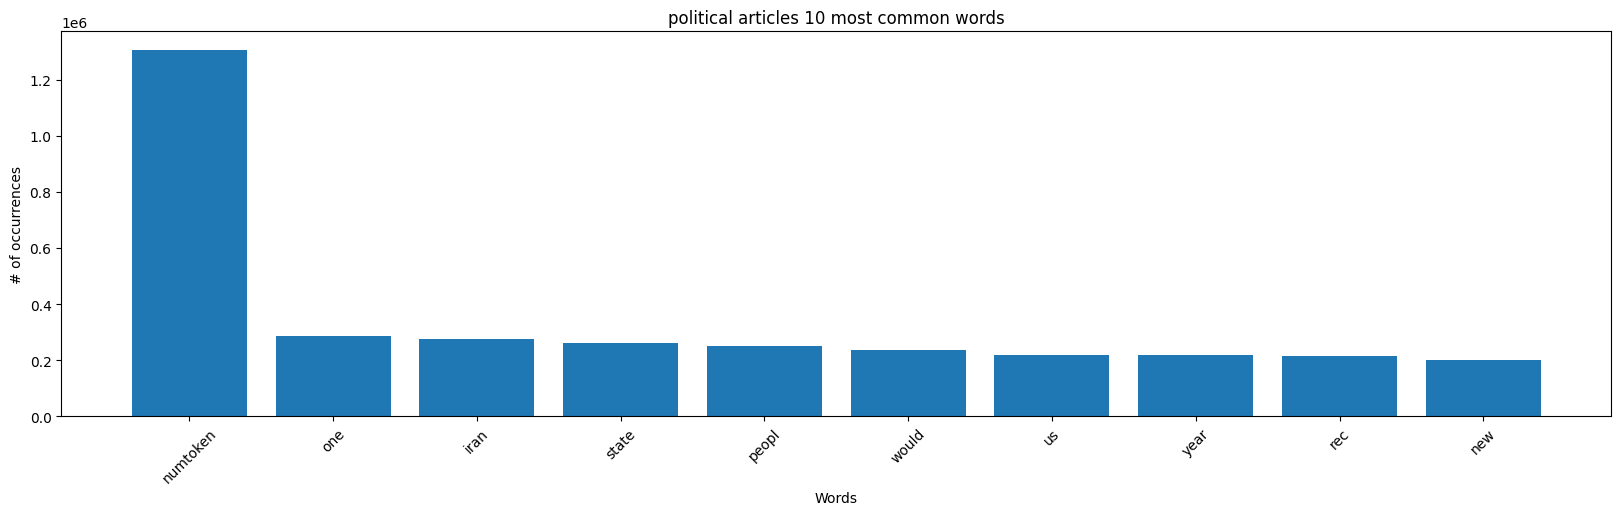

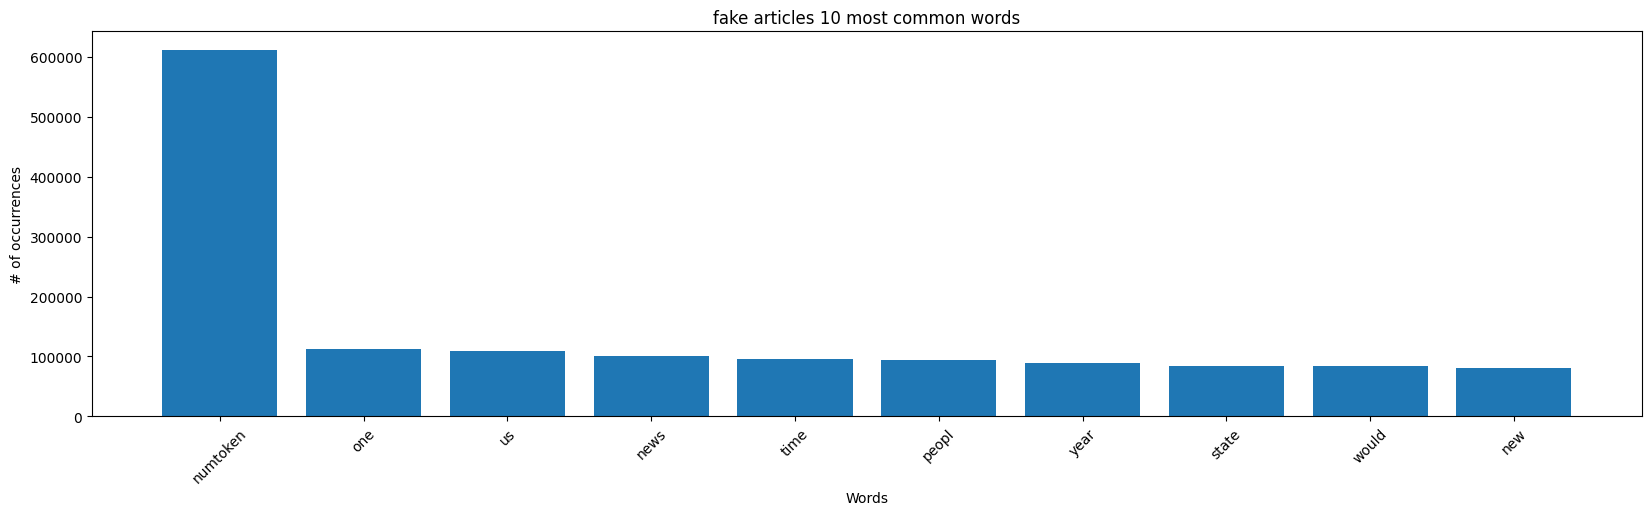

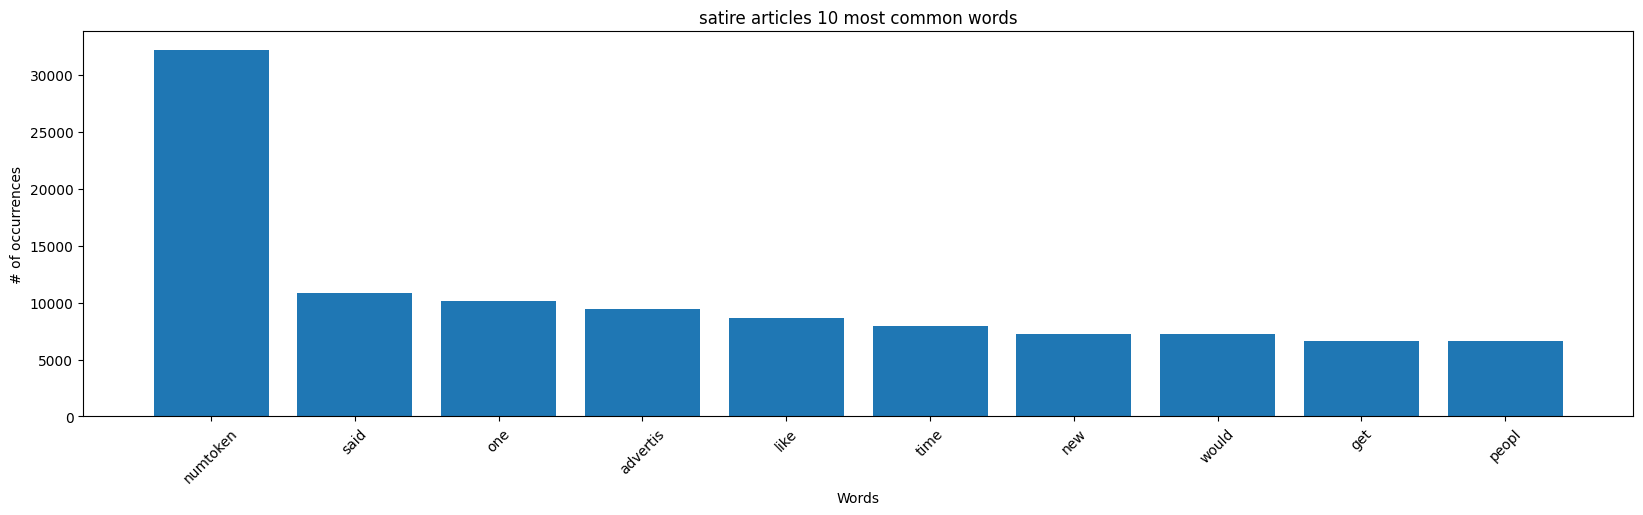

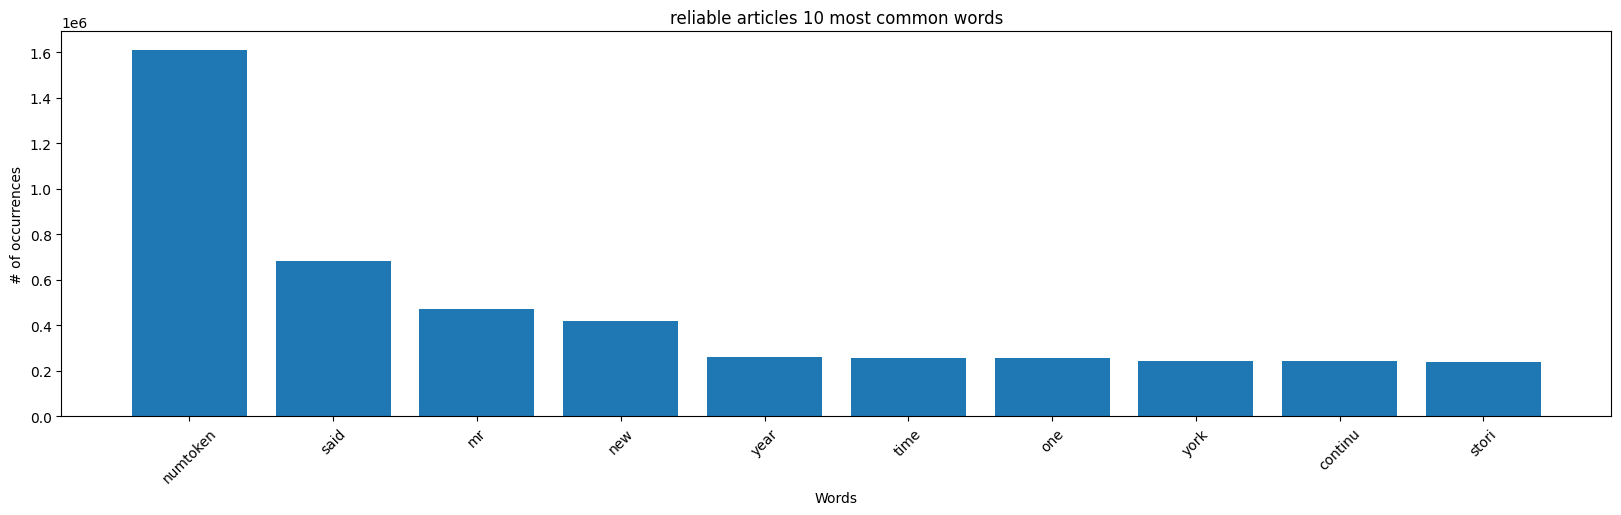

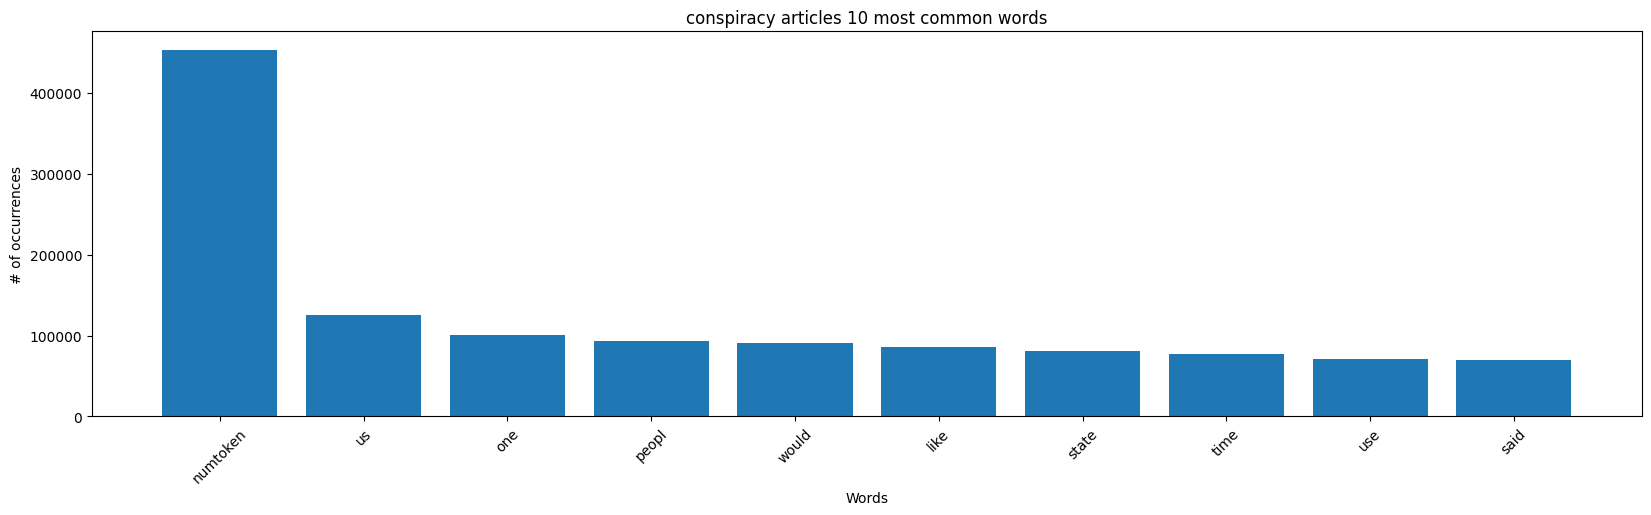

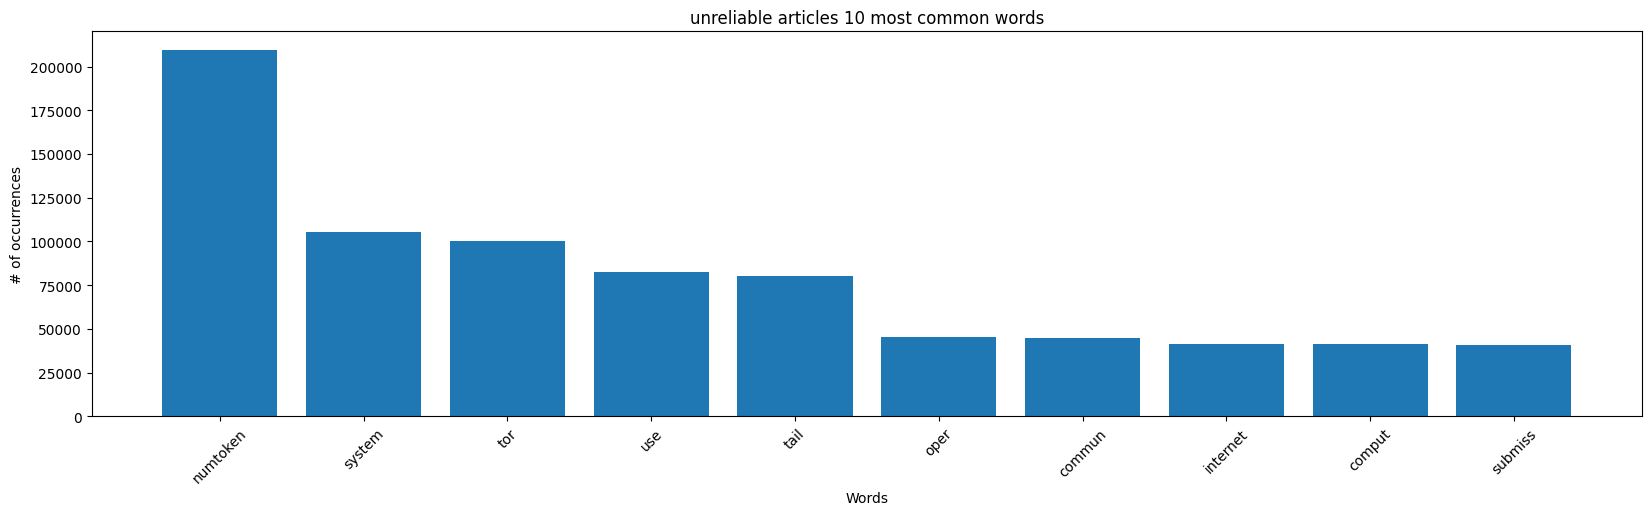

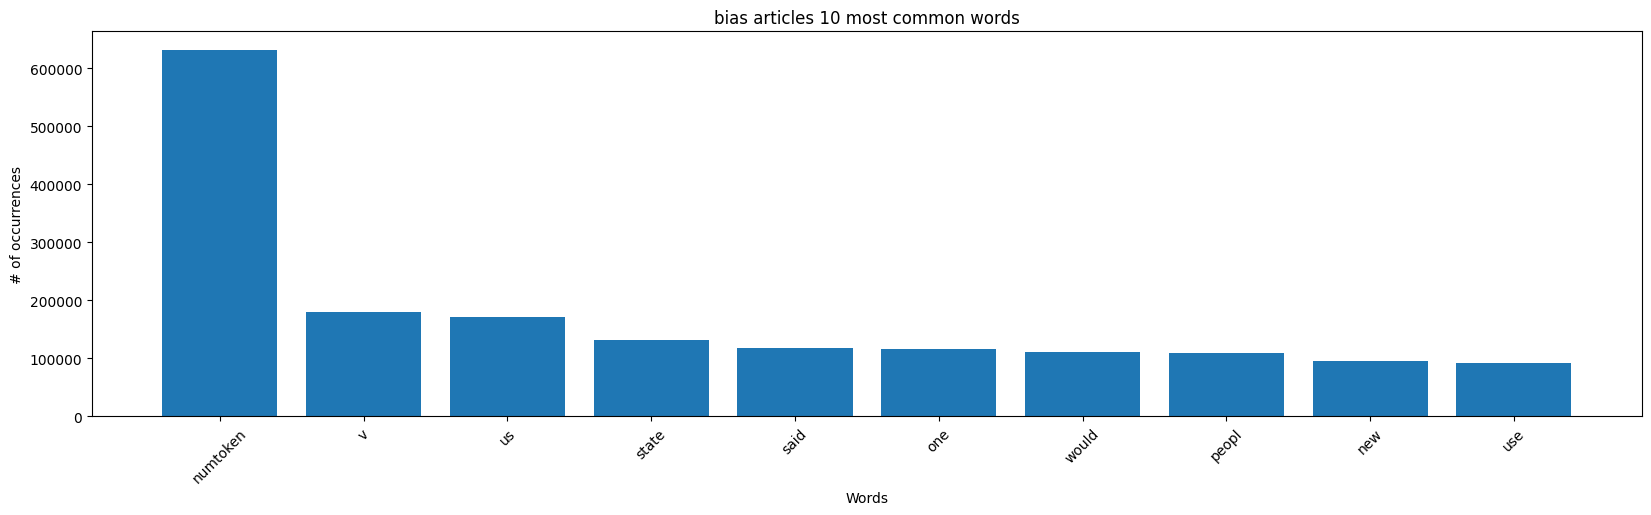

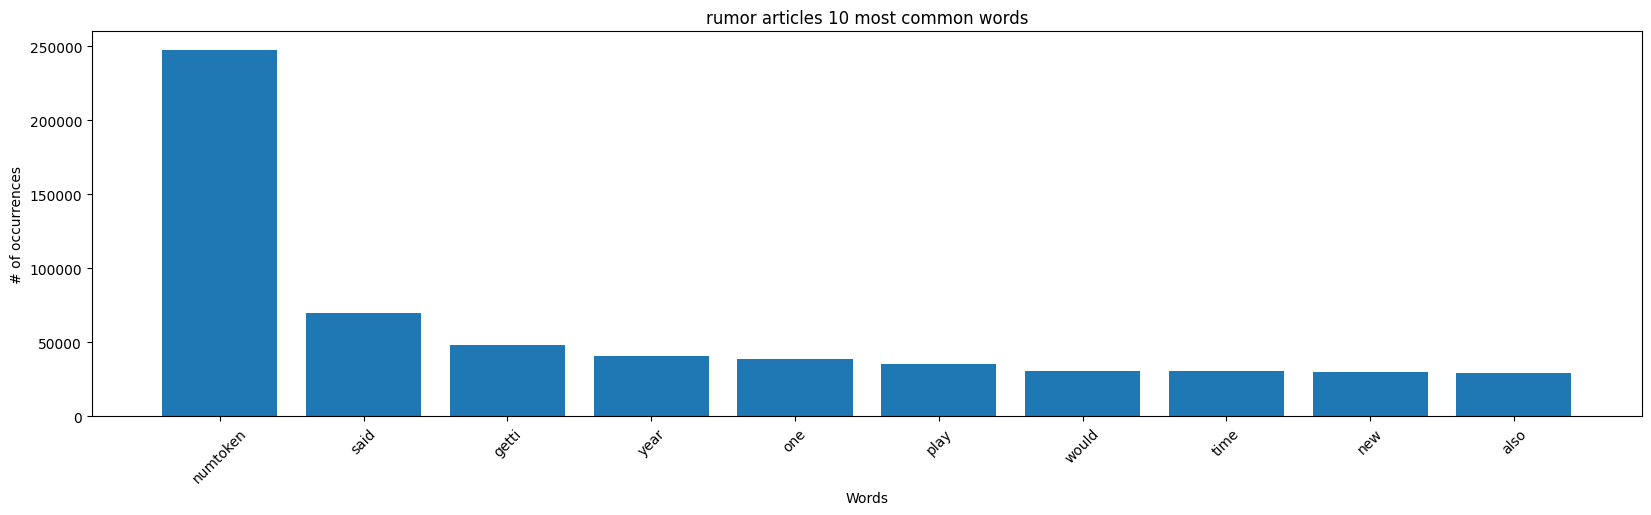

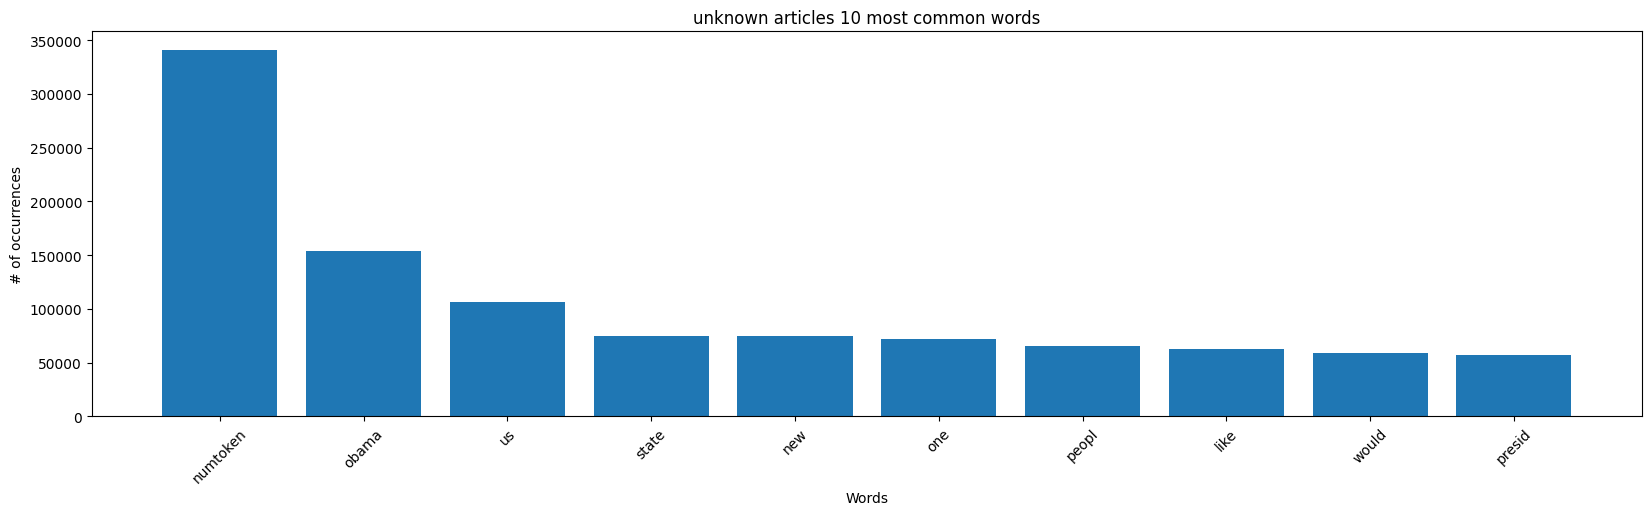

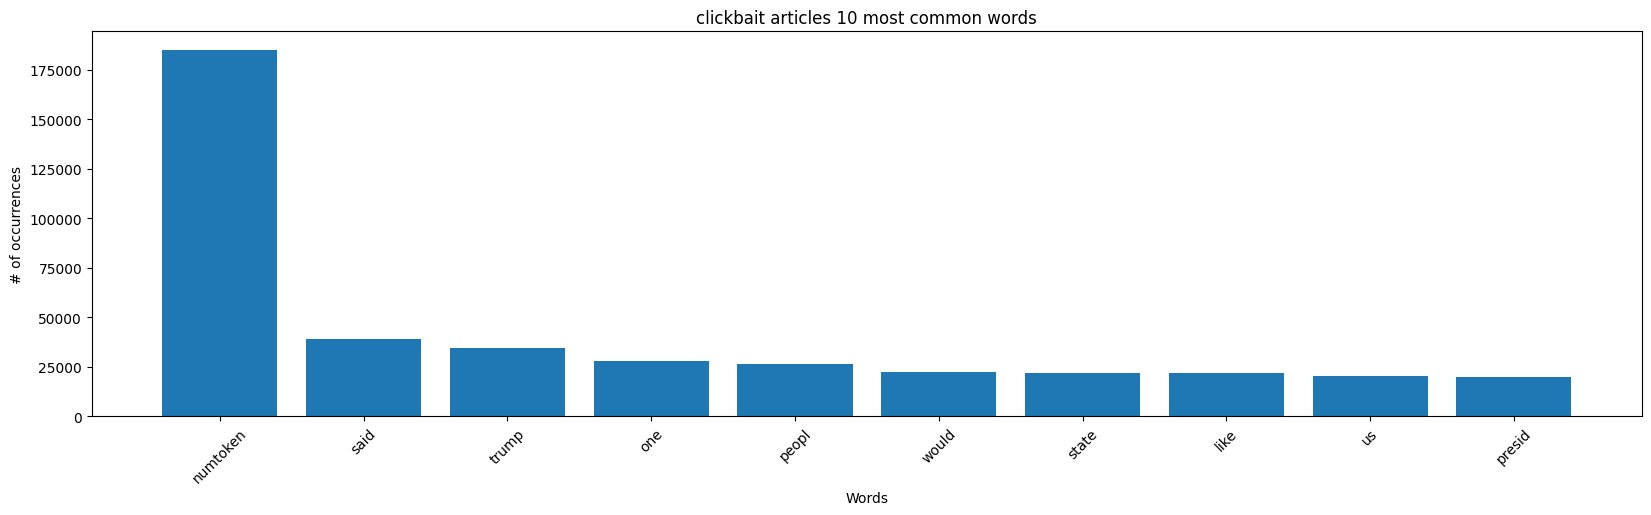

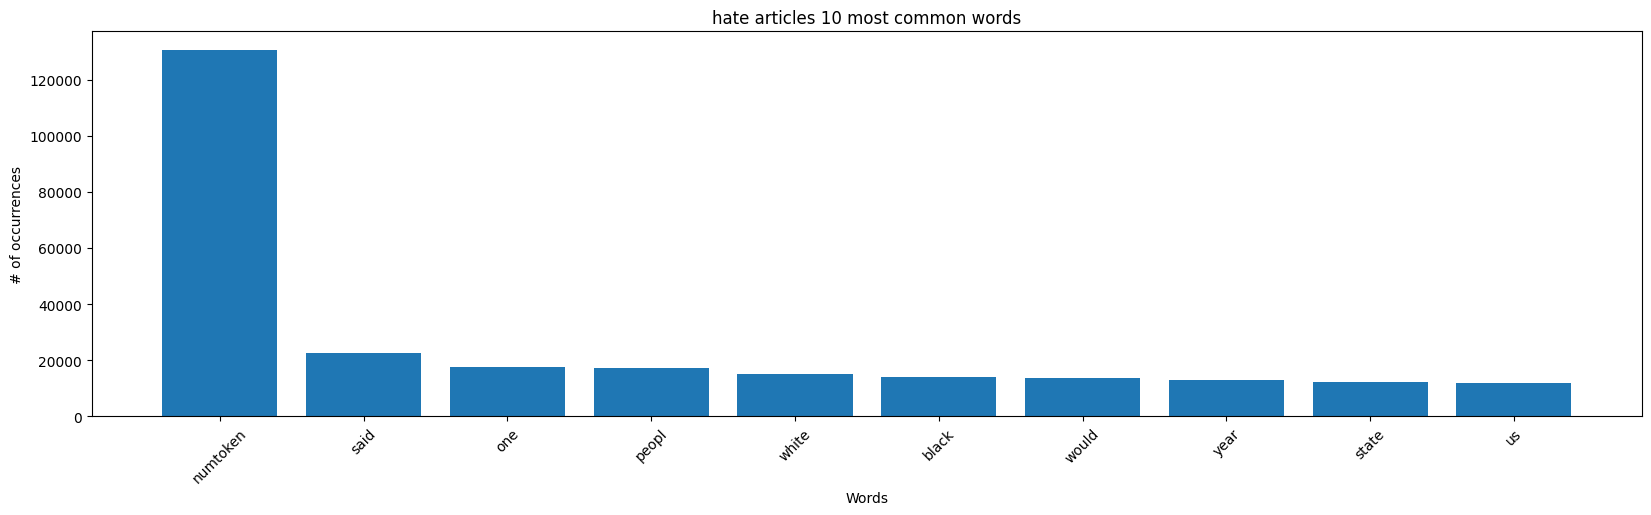

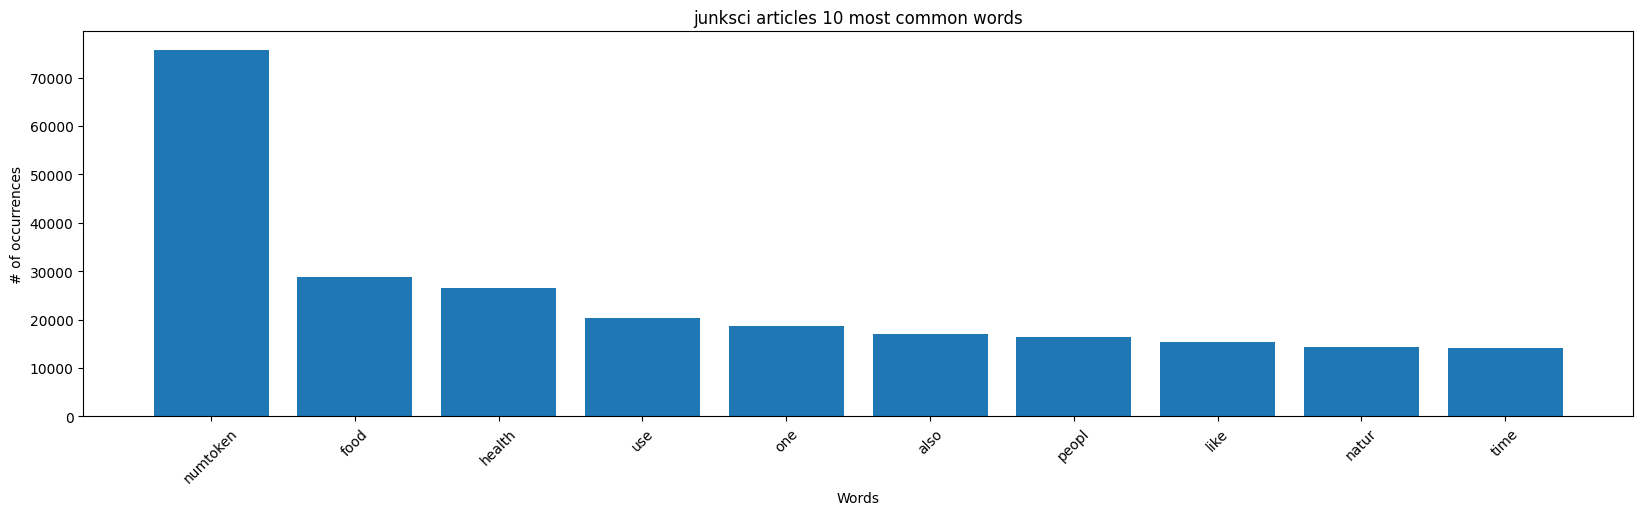

In [35]:
output_dir = 'data/common_words_by_type'
os.makedirs(output_dir, exist_ok=True)

for t in df['type'].unique():
    type_word_counts = {}
    for content in df[df['type'] == t]['content']:
        for word in content:
            if word in type_word_counts:
                type_word_counts[word] += 1
            else:
                type_word_counts[word] = 1
    
    top_10_words = sorted(type_word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
    ws = []
    cs = []
    for word in top_10_words:
        (w, c) = word
        ws.append(w)
        cs.append(c)

    fig1 = plt.figure(figsize=(20, 5))
    ax1 = fig1.add_subplot(111)
    ax1.bar(ws, cs)
    ax1.set_title(f'{t} articles 10 most common words')
    ax1.set_xlabel('Words')
    plt.xticks(rotation=45)
    ax1.set_ylabel('# of occurrences')
    fig1.savefig(f'{output_dir}/{t}10_most_common_words.png')
    fig1.show()

#### Without numtoken:

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_2308\4259377716.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


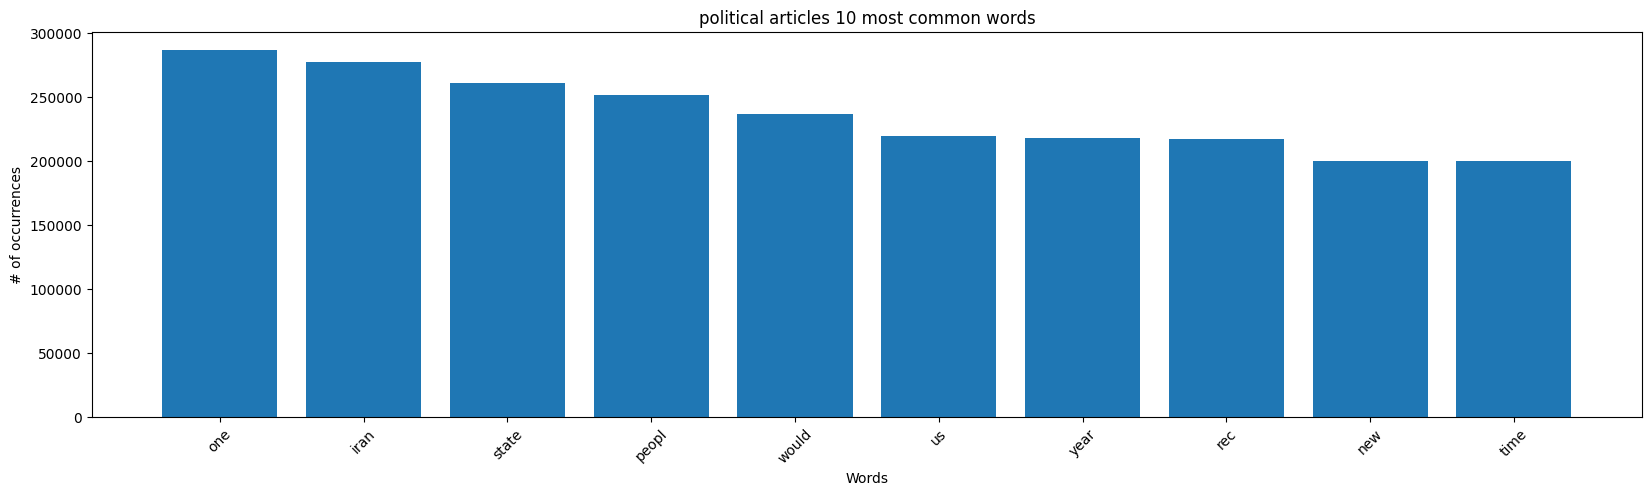

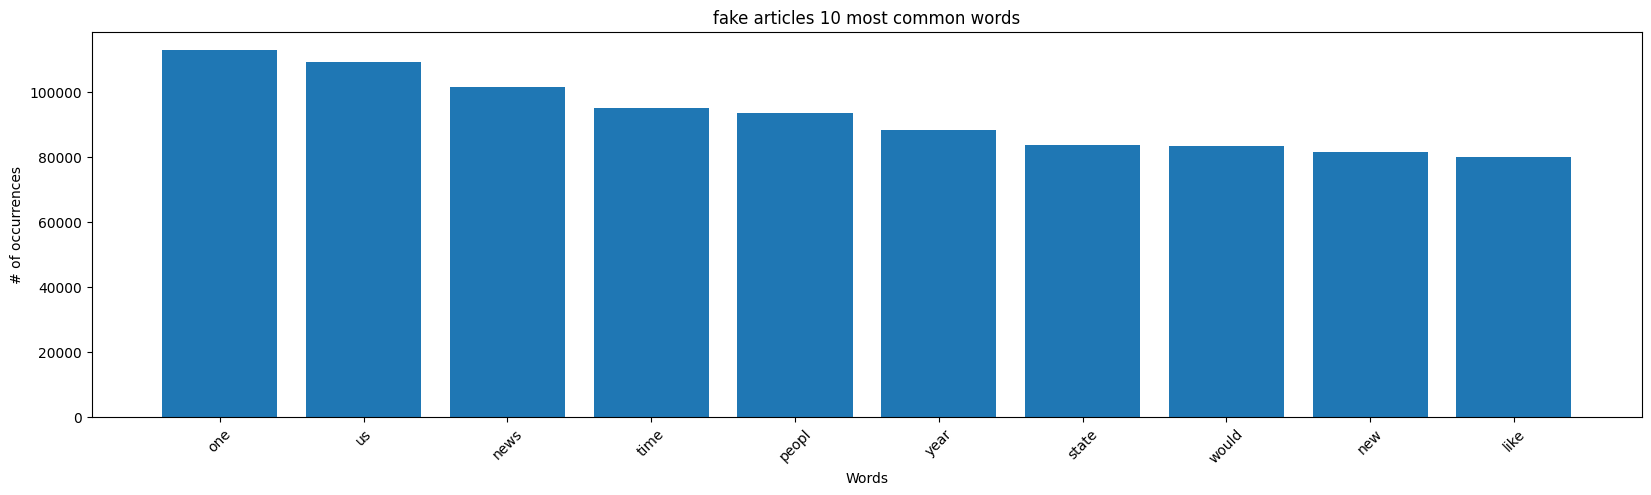

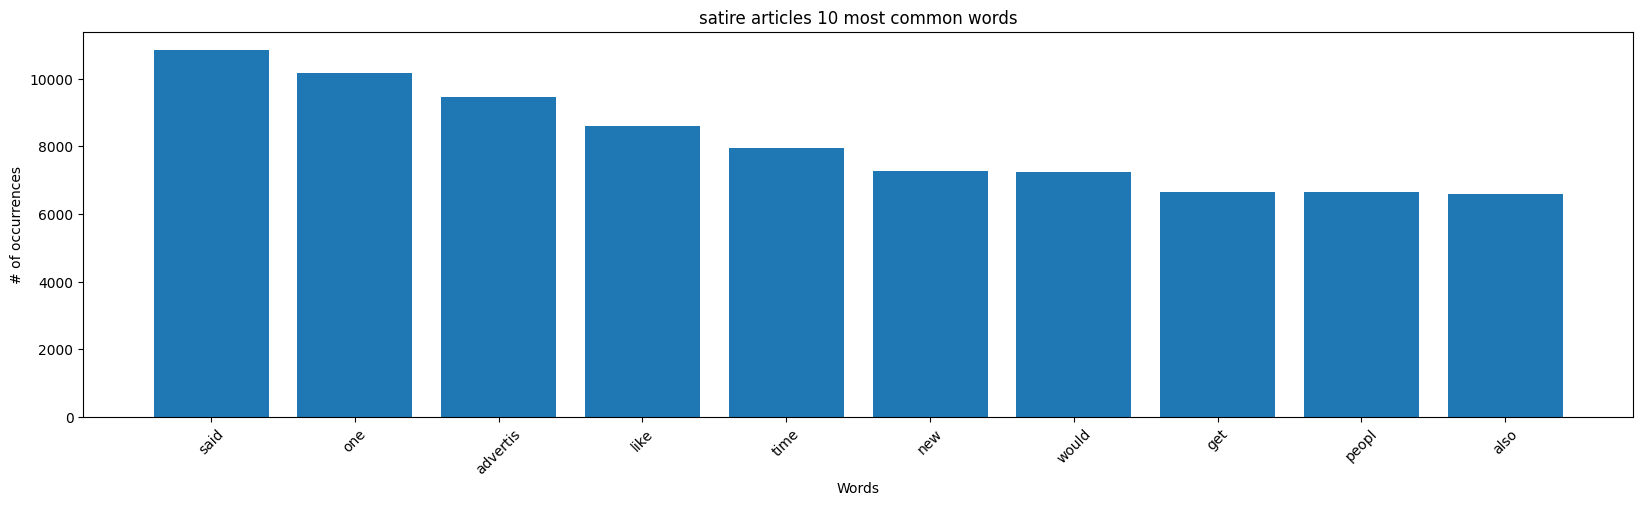

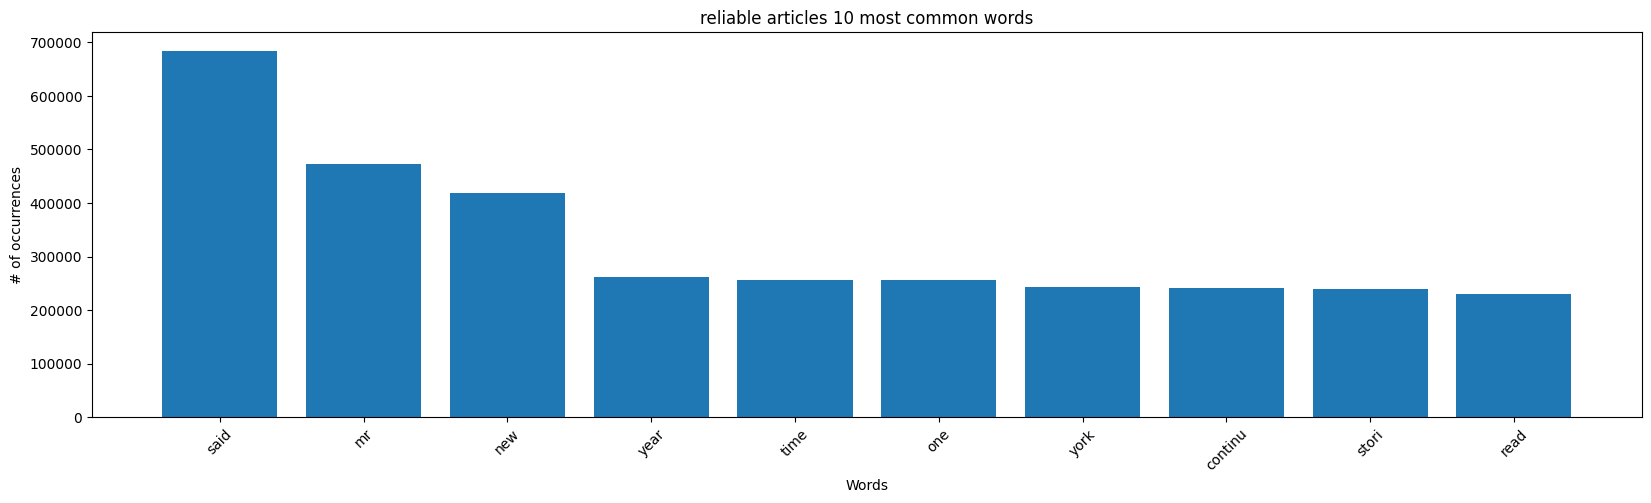

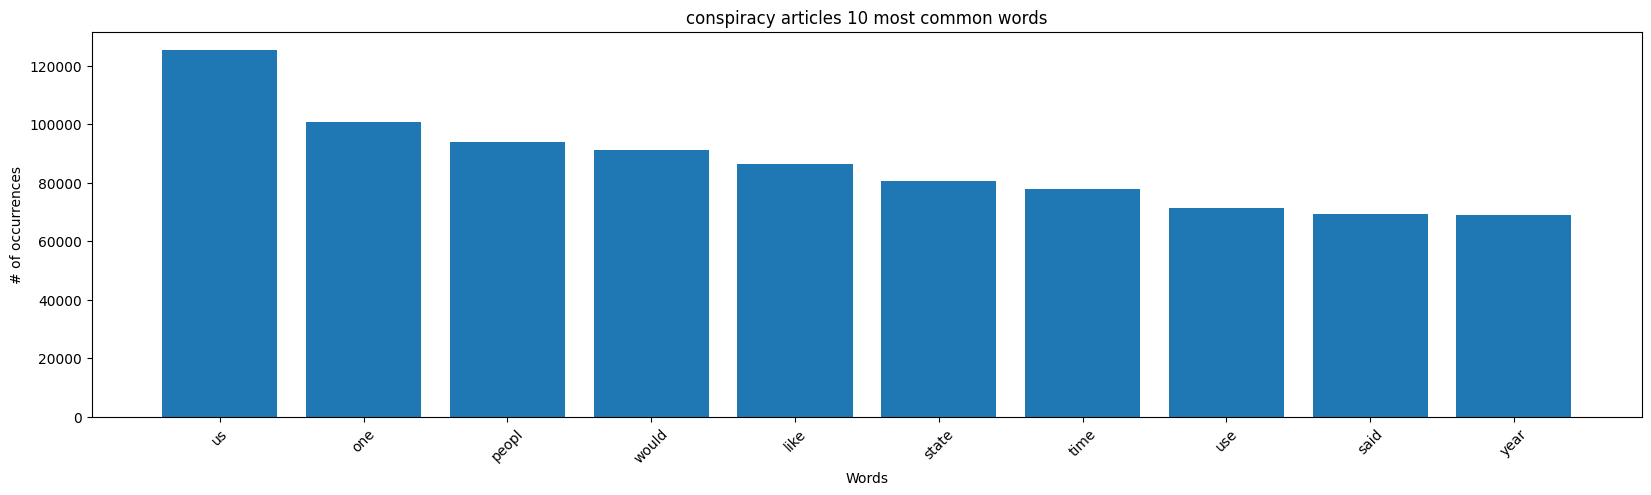

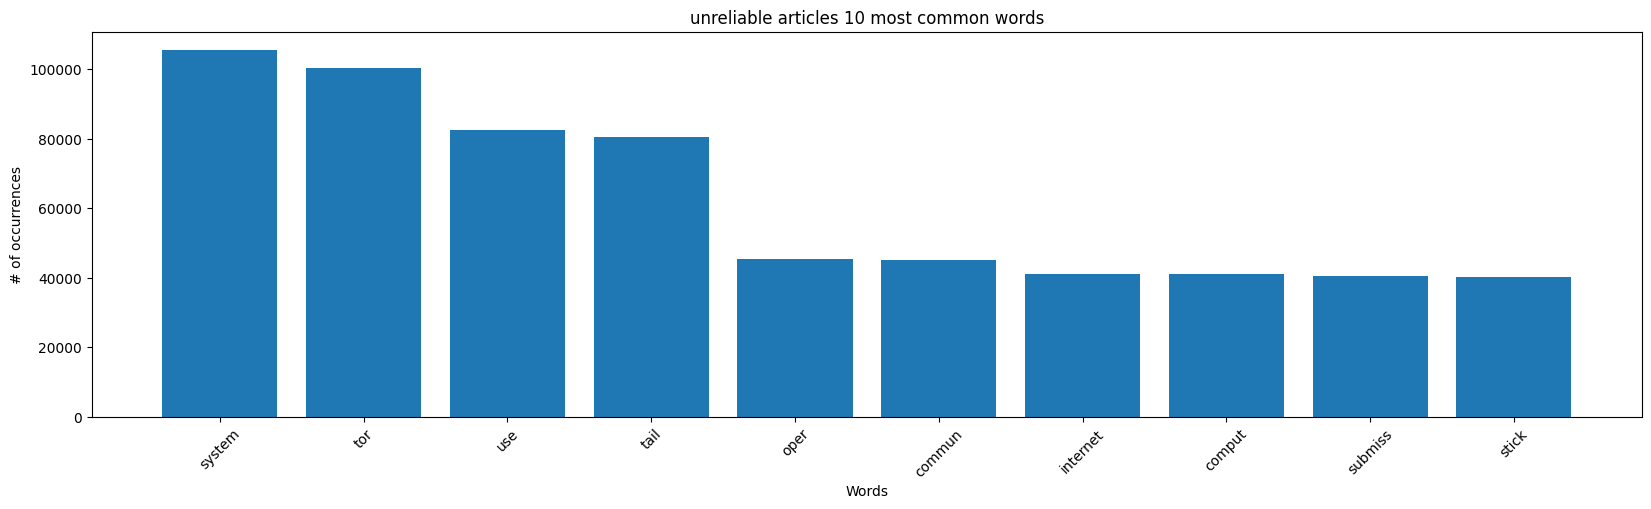

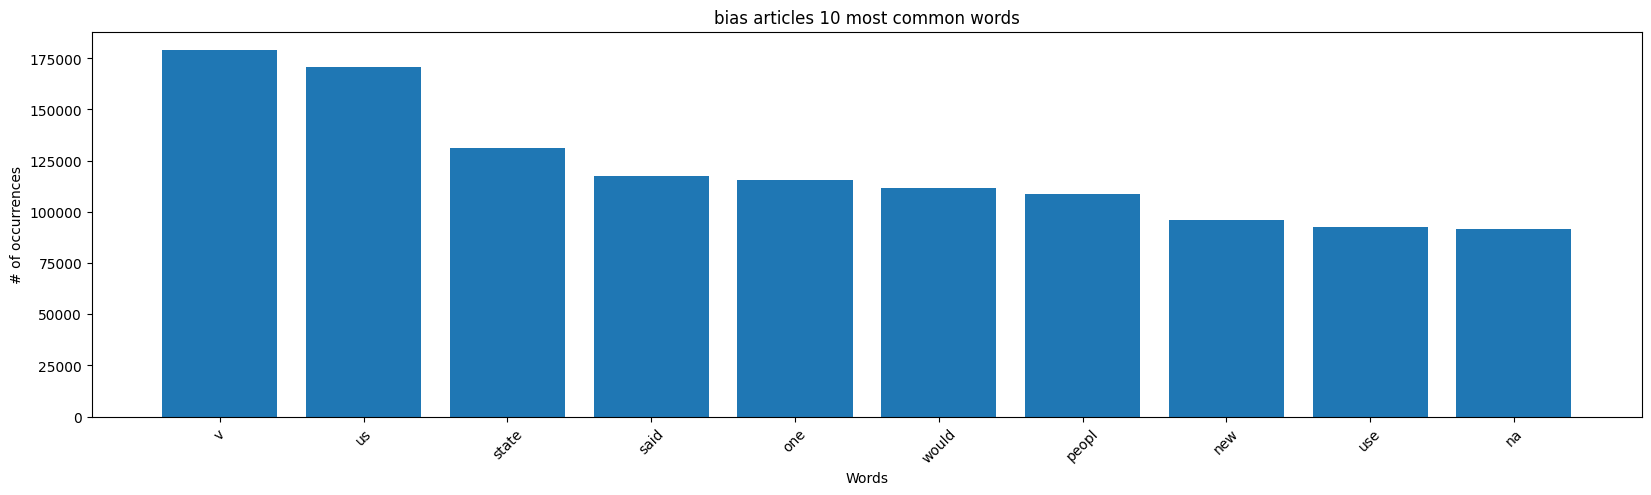

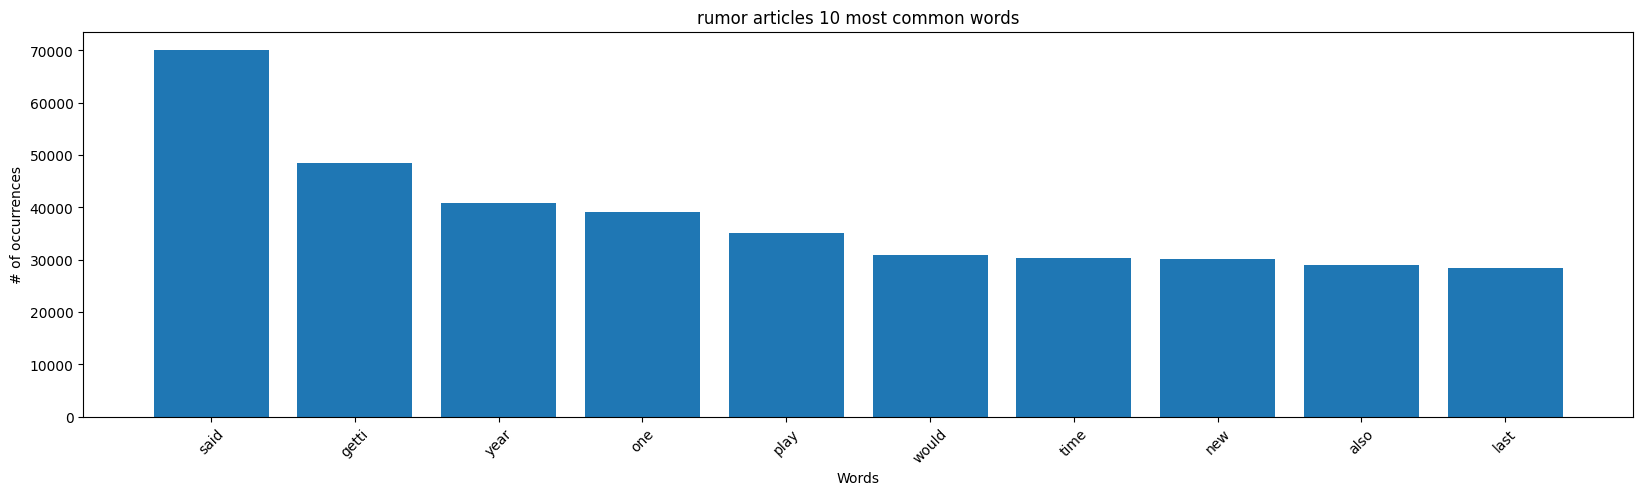

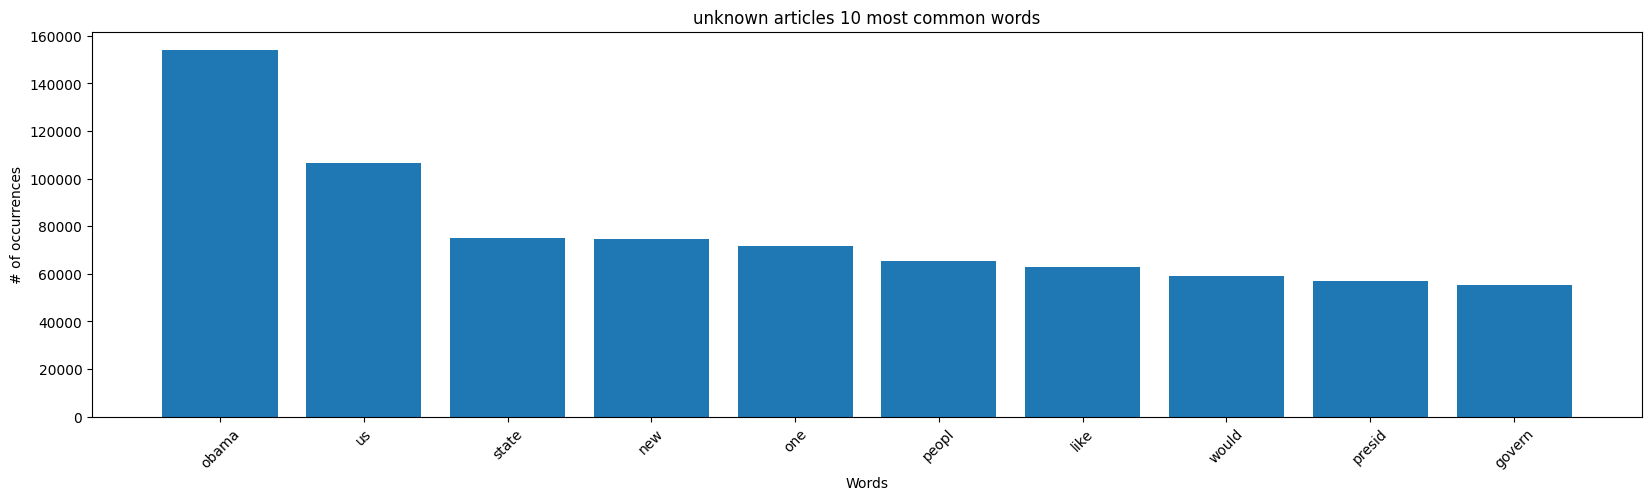

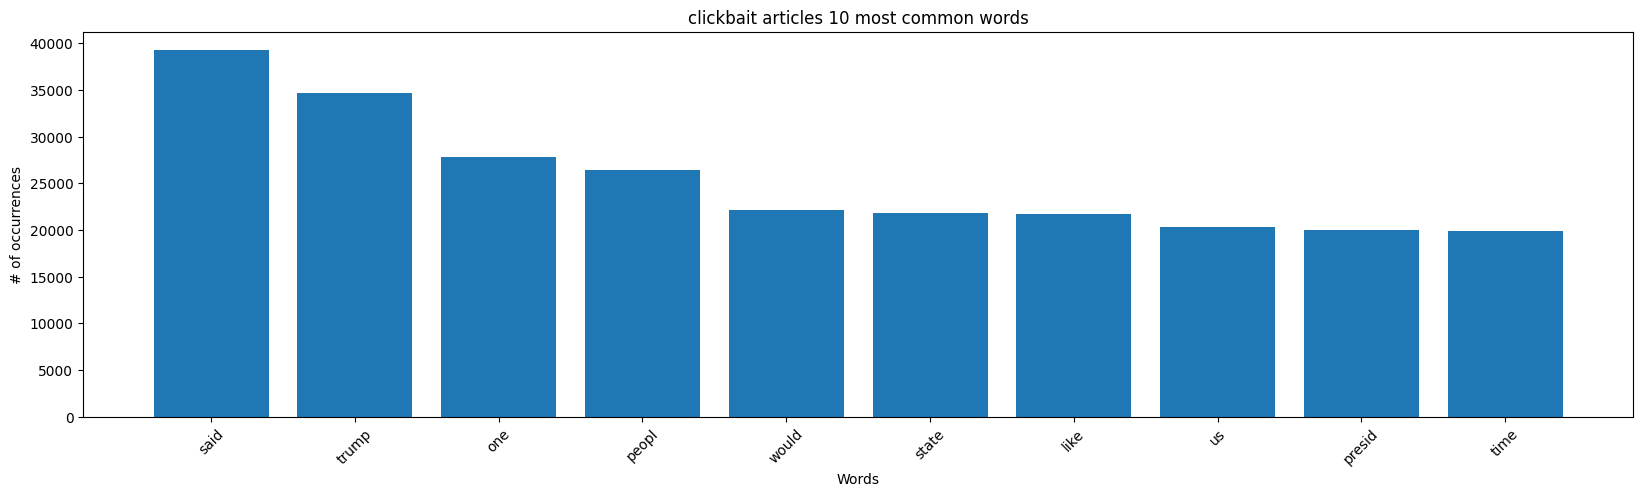

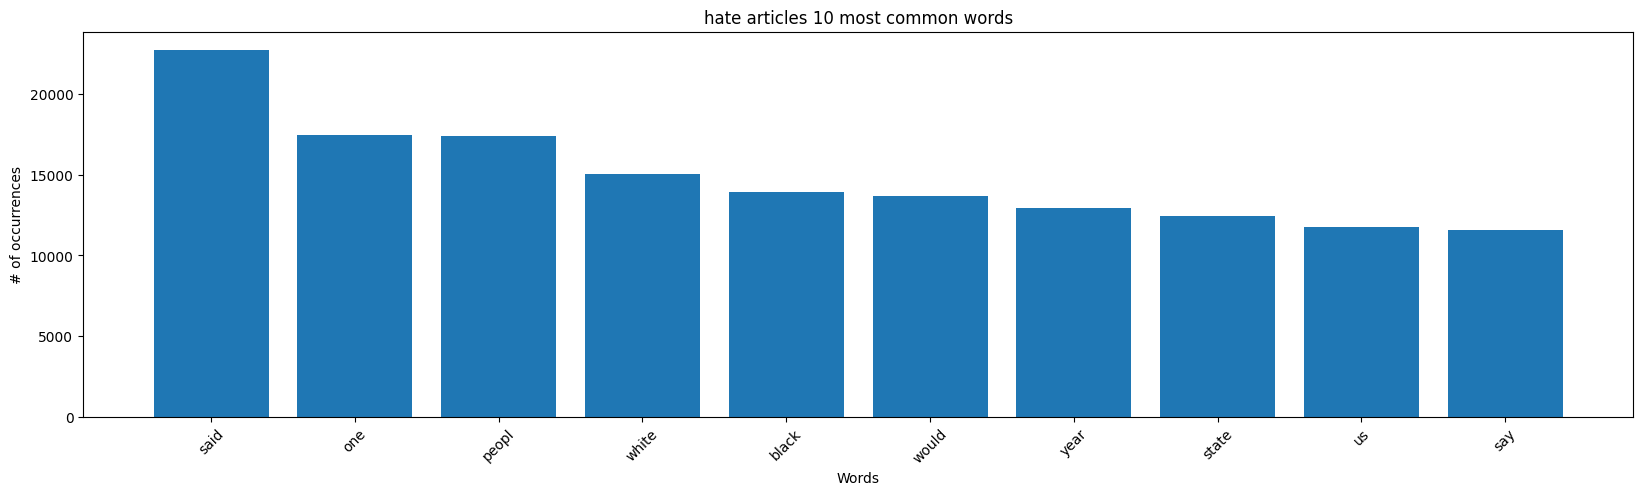

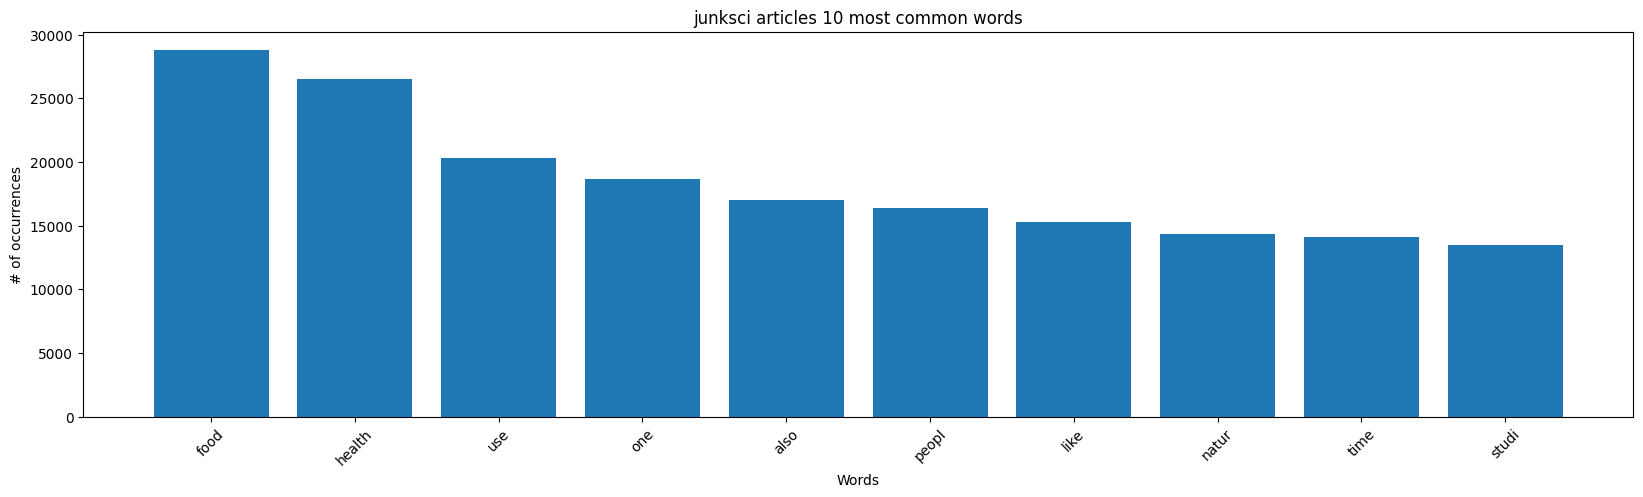

In [36]:
output_dir = 'data/common_words_by_type(-numtoken)'
os.makedirs(output_dir, exist_ok=True)

for t in df['type'].unique():
    type_word_counts = {}
    for content in df[df['type'] == t]['content']:
        for word in content:
            if word in type_word_counts:
                type_word_counts[word] += 1
            else:
                type_word_counts[word] = 1
    
    top_10_words = sorted(type_word_counts.items(), key=lambda x: x[1], reverse=True)[1:11]
    ws = []
    cs = []
    for word in top_10_words:
        (w, c) = word
        ws.append(w)
        cs.append(c)

    fig1 = plt.figure(figsize=(20, 5))
    ax1 = fig1.add_subplot(111)
    ax1.bar(ws, cs)
    ax1.set_title(f'{t} articles 10 most common words')
    ax1.set_xlabel('Words')
    plt.xticks(rotation=45)
    ax1.set_ylabel('# of occurrences')
    fig1.savefig(f'{output_dir}/{t}10_most_common_words(-numtoken).png')
    fig1.show()

### Distributions of article lengths

In [37]:
def length_distribution_hist(df, t):
    if t == 'all':
        output_dir = 'data'
        os.makedirs(output_dir, exist_ok=True)
    else:
        output_dir = 'data/article_length_distributions'
        os.makedirs(output_dir, exist_ok=True)
    nbins = 100

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    fig.set_figwidth(10)
    fig.set_figheight(5)
    axs[0].hist(df['length'], bins=nbins)
    axs[0].set_title(f'{t} articles length distribution')
    axs[1].hist(np.log(df['length']), bins=nbins)
    axs[1].set_title(f'{t} Log article length distribution')

    fig.savefig(f'{output_dir}/{t}articles_length_distribution.png')
    plt.show()

#### For the entire set:

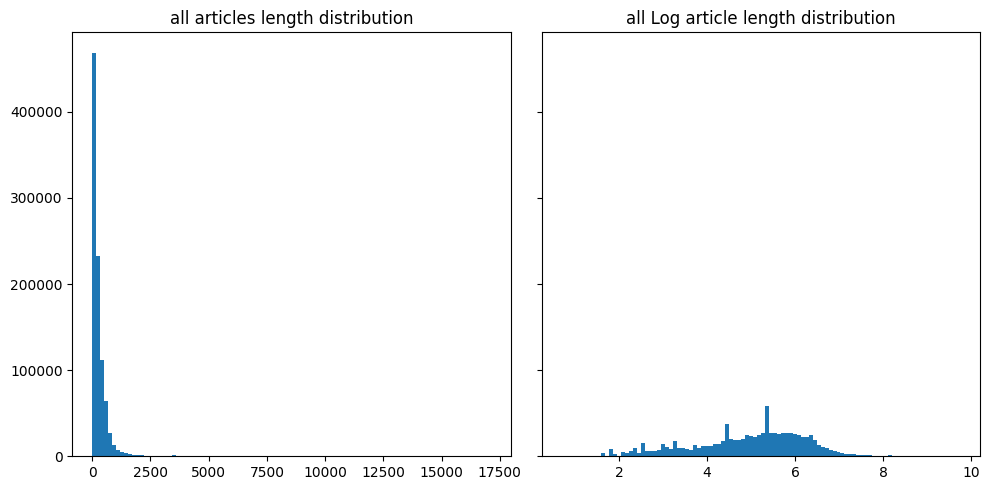

In [38]:
length_distribution_hist(df, 'all')

#### By type:

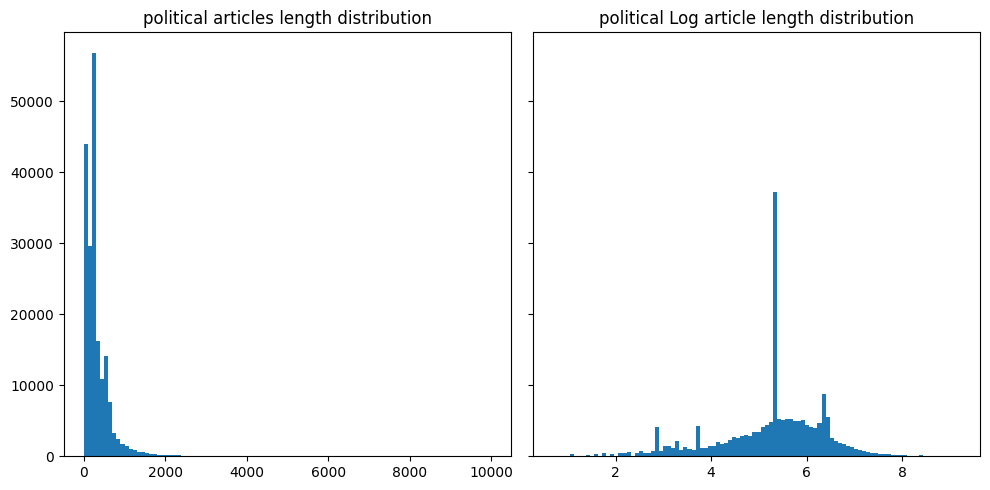

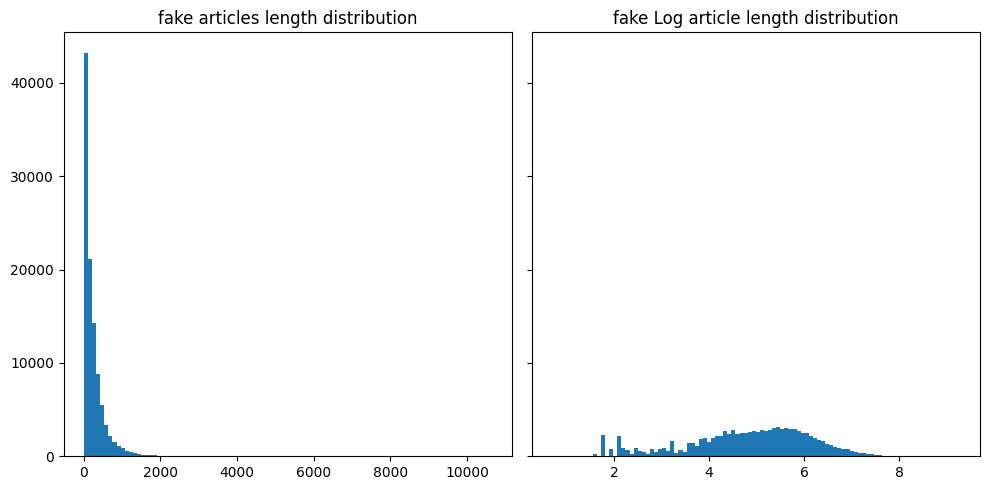

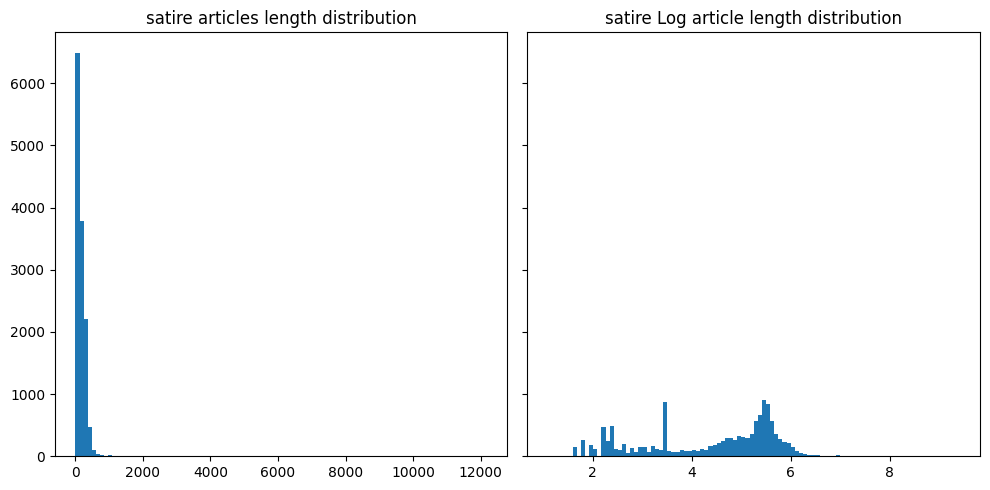

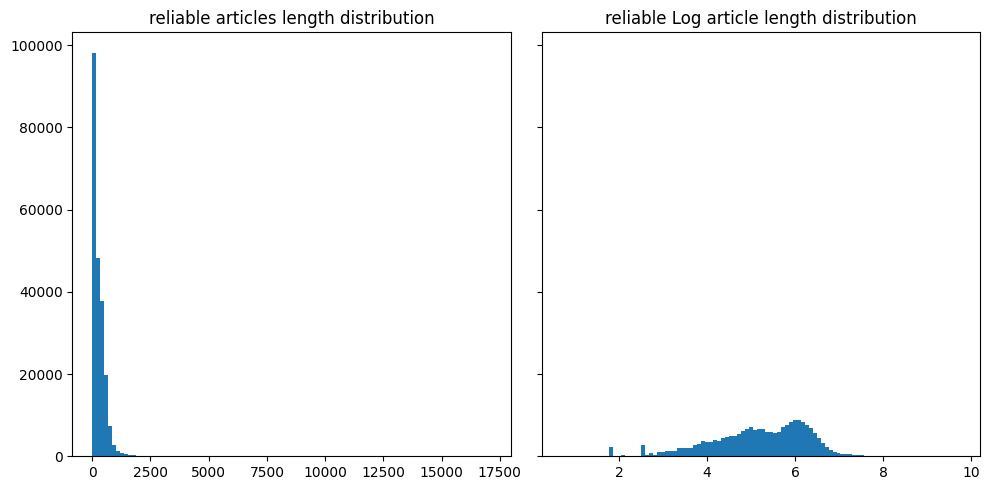

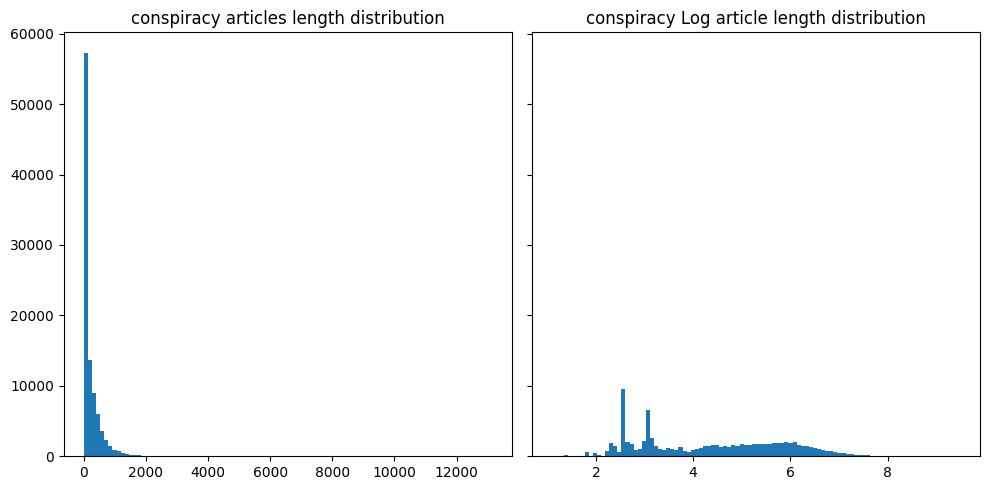

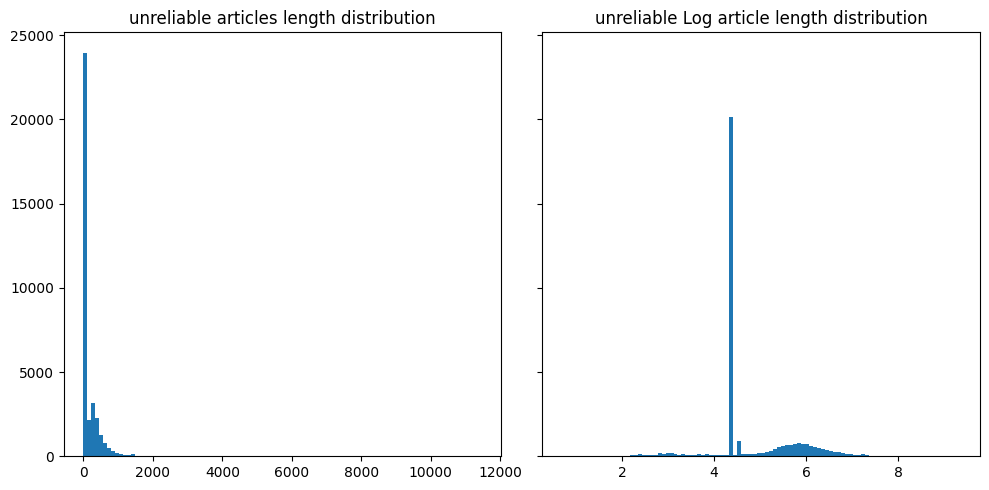

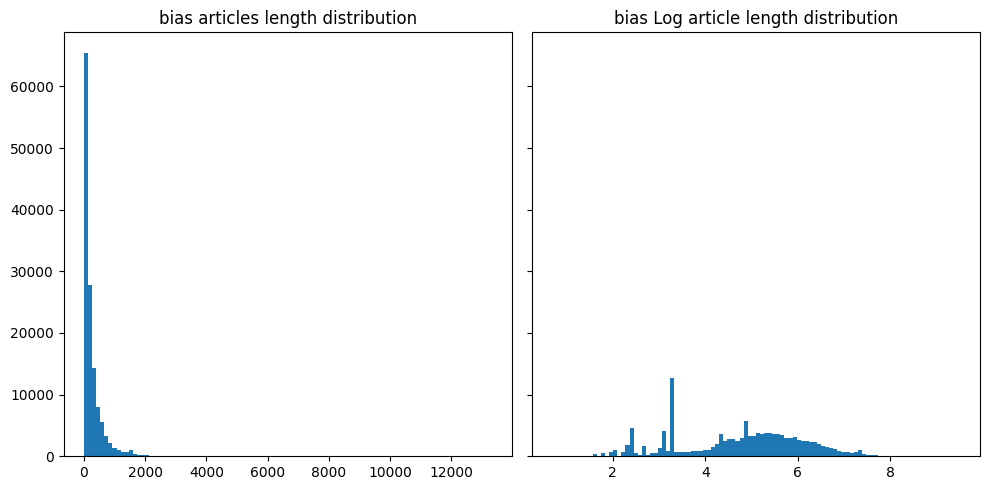

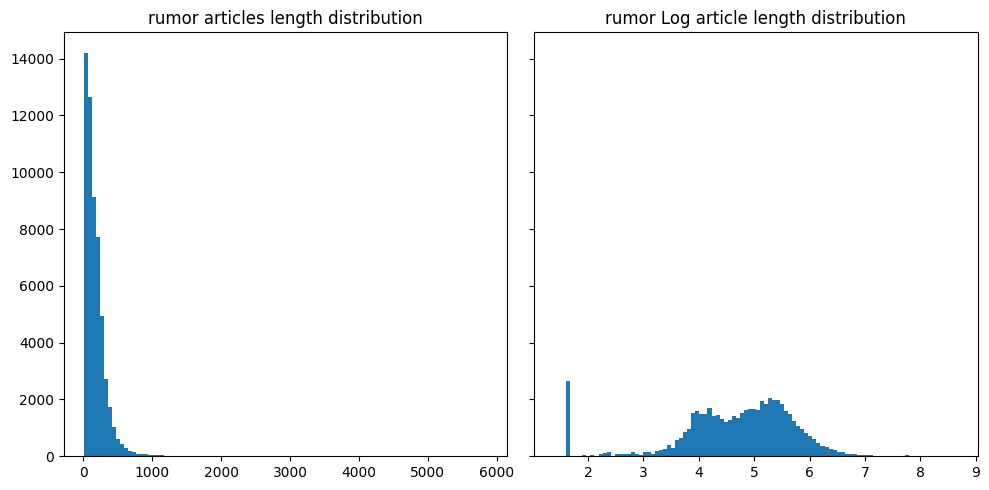

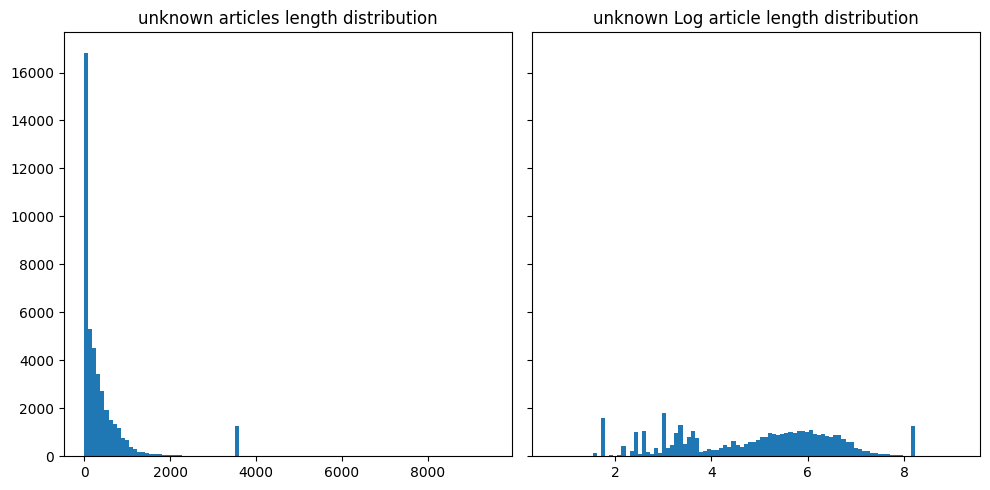

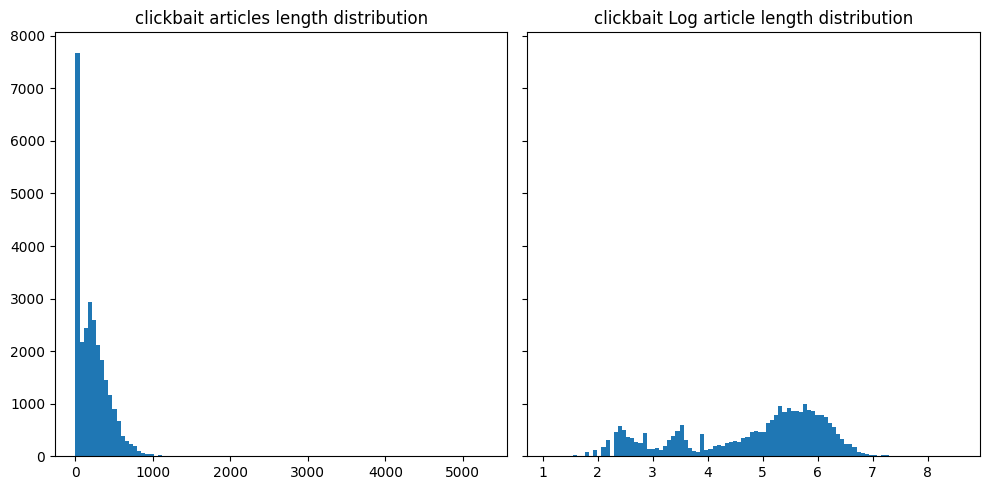

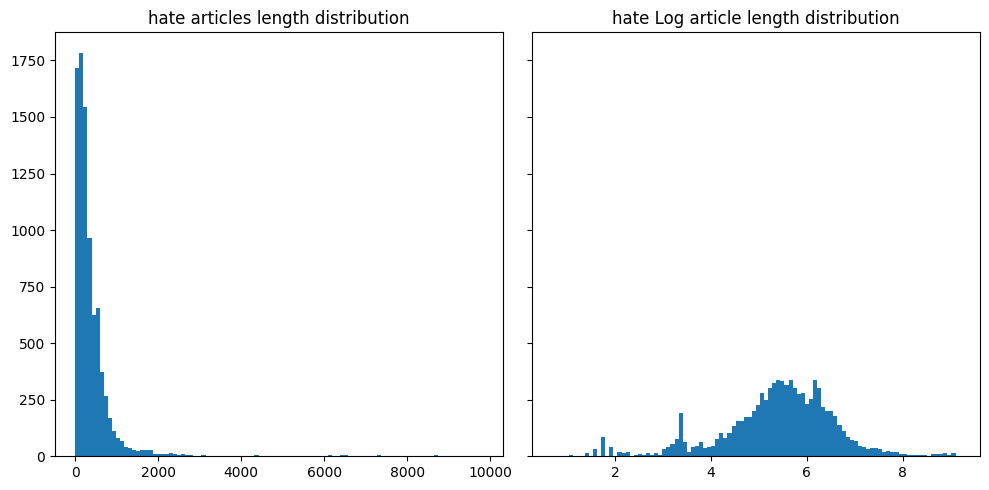

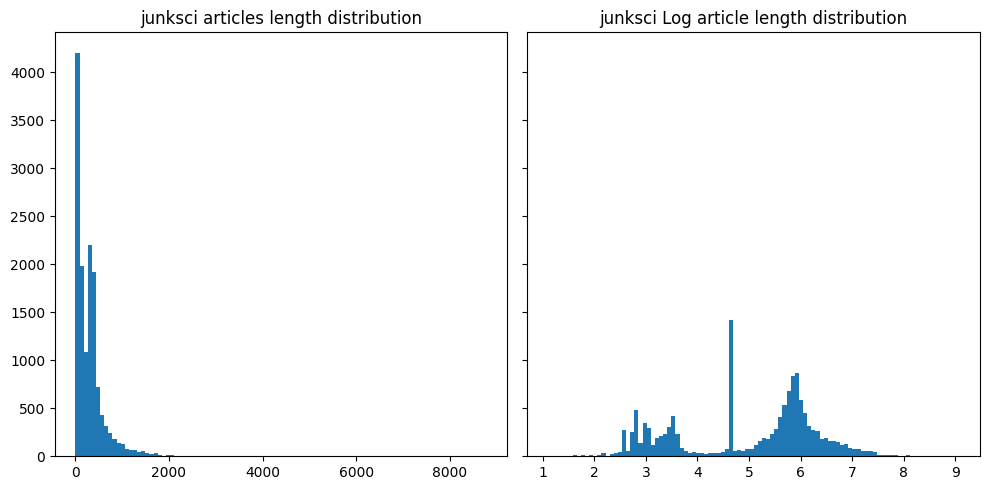

In [39]:
for t in df['type'].unique():
    type_df = df[df['type'] == t]
    length_distribution_hist(type_df, t)

### Article lengths vs. number of distinct words

#### For all articles:

C:\Users\Rasmus\AppData\Local\Temp\ipykernel_2308\3207736606.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, s=1, c=color_map(i))


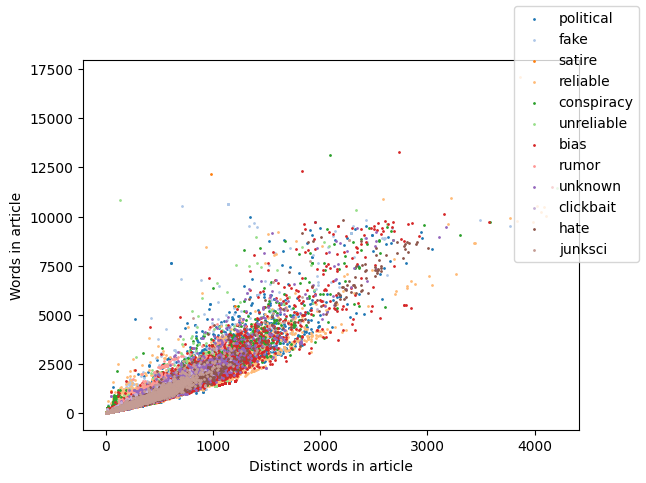

In [40]:
i = 0
color_map = plt.get_cmap('tab20')
legend_dict = {}
for t in df['type'].unique():
    type_df = df[df['type'] == t]
    x = type_df['length_distinct_words']
    y = type_df['length']
    color = plt.colormaps
    plt.scatter(x, y, s=1, c=color_map(i))
    del type_df

    legend_dict.update({f'{t}': color_map(i)})

    i += 1
plt.figlegend(legend_dict)
plt.xlabel('Distinct words in article')
plt.ylabel('Words in article')
plt.savefig('data/article_length_vs_distinct_words.png')
plt.show()

#### By type:

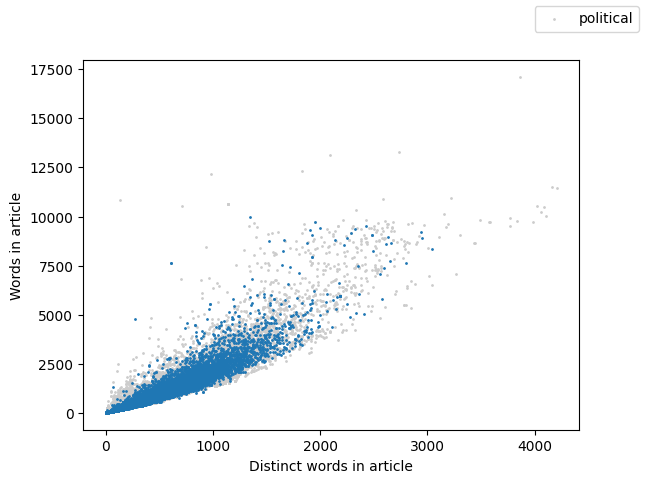

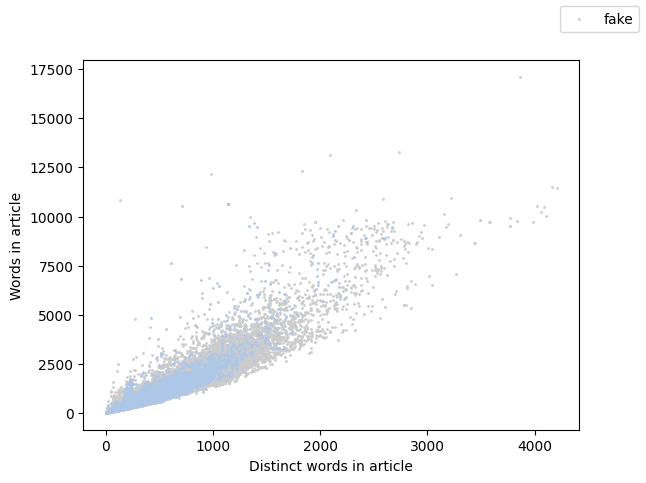

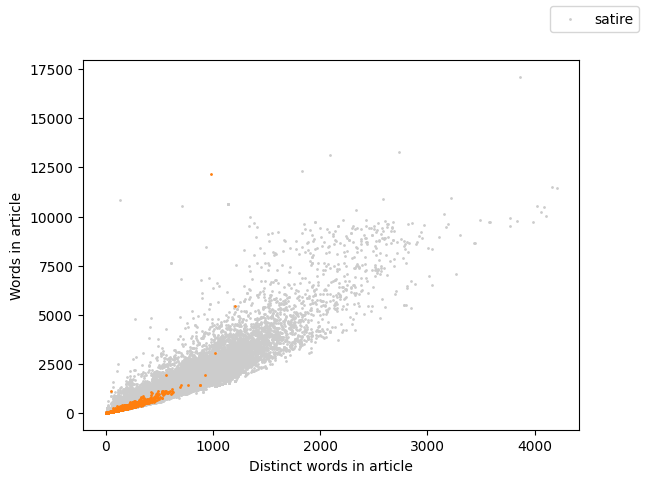

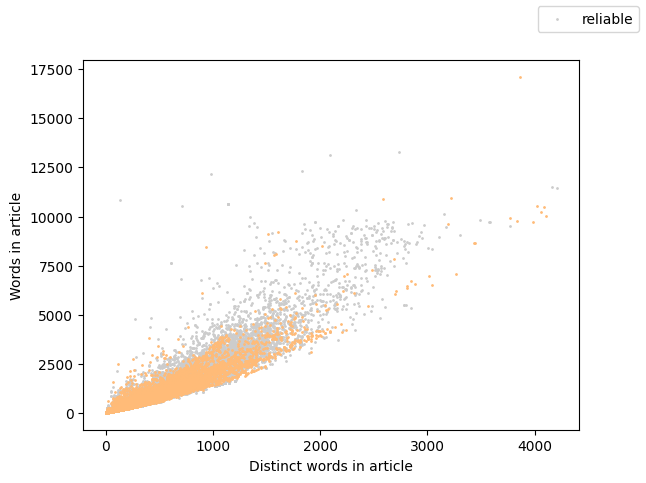

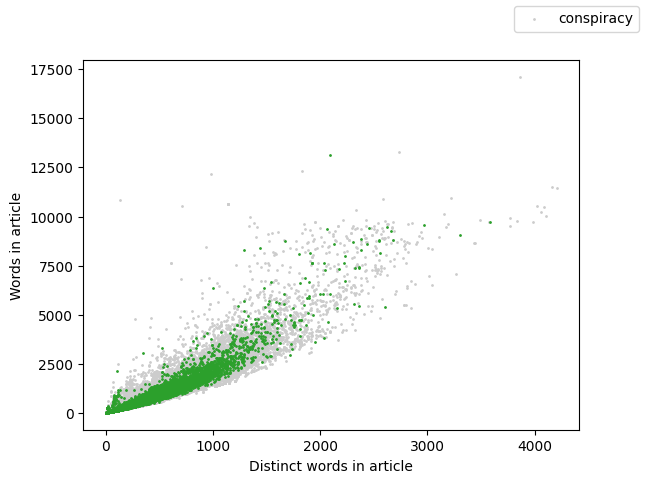

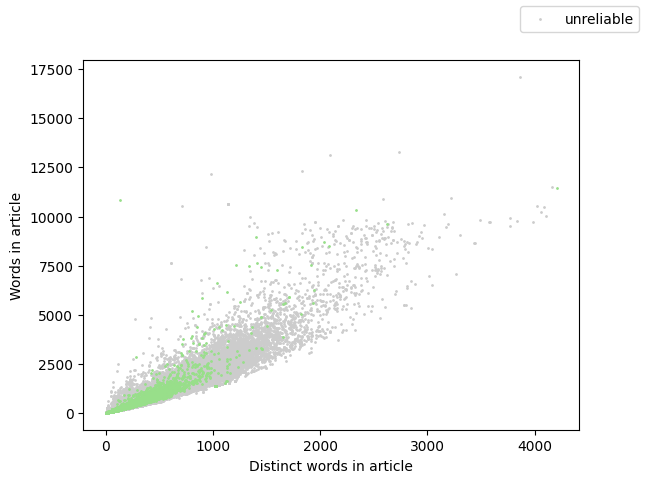

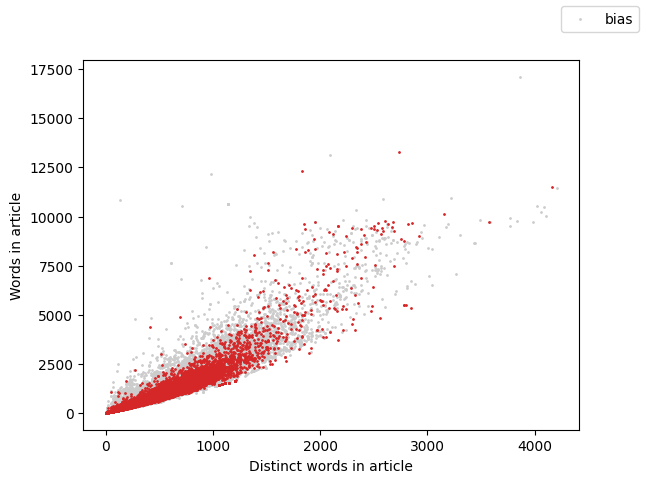

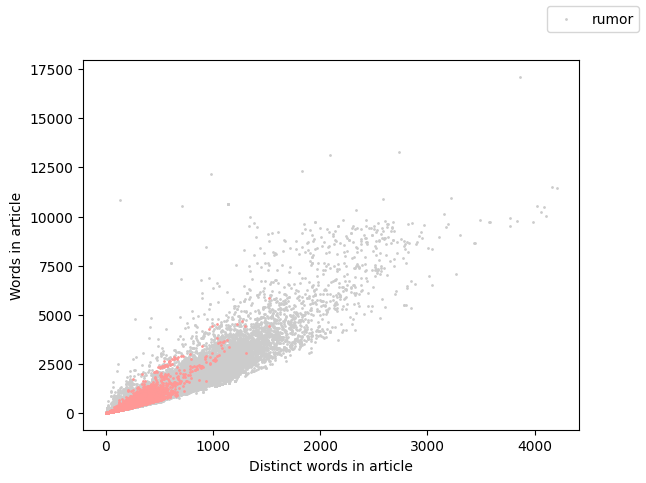

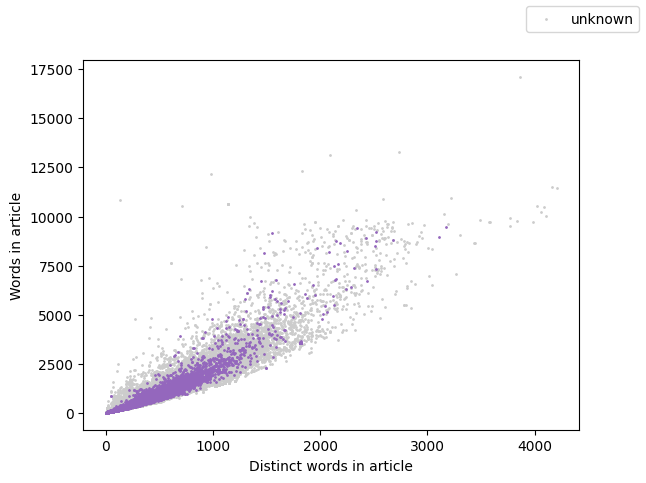

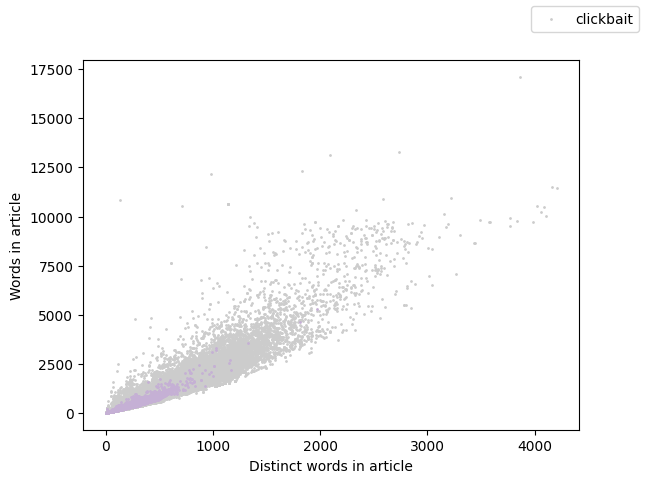

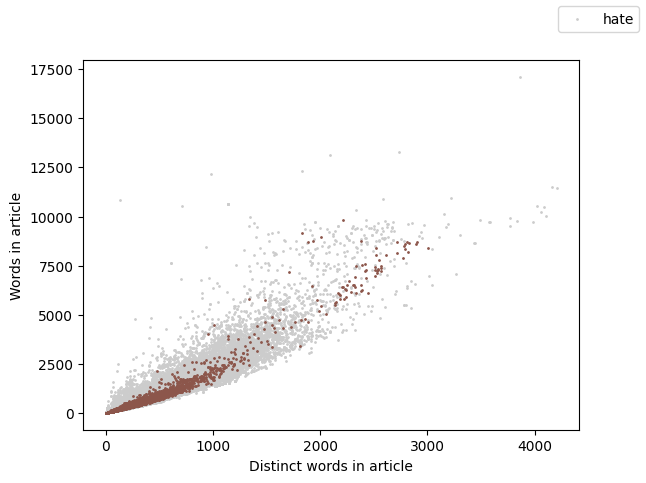

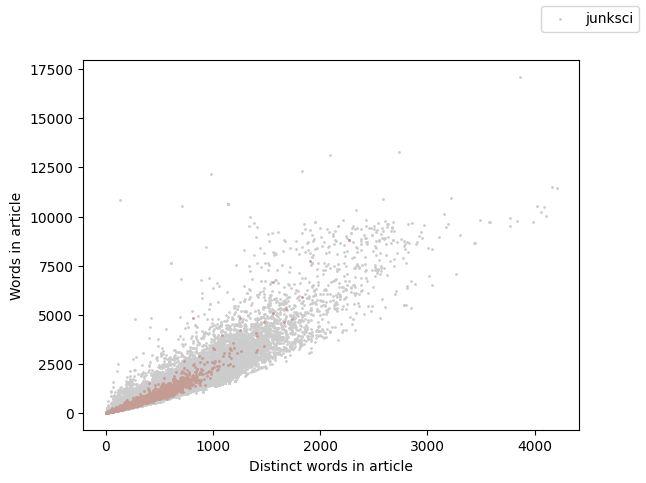

In [41]:
output_dir = 'data/article_length_vs_distinct_words_by_type'
os.makedirs(output_dir, exist_ok=True)
i = 0
for t in df['type'].unique():
    type_df = df[df['type'] == t]
    rest_df = df[df['type'] != t]
    color_map = plt.get_cmap('tab20')
    tx = type_df['length_distinct_words']
    ty = type_df['length']
    rx = rest_df['length_distinct_words']
    ry = rest_df['length']   
    color = plt.colormaps
    plt.scatter(rx, ry, s=1, color='0.8')
    plt.scatter(tx, ty, s=1, color=color_map(i))
    del type_df
    del rest_df
    i += 1
    plt.figlegend({f'{t}': color_map(i)})
    plt.xlabel('Distinct words in article')
    plt.ylabel('Words in article')
    plt.savefig(f'{output_dir}/{t}_article_length_vs_distinct_words.png')
    plt.show()